In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [17]:
def posterior_grid_approx(grid_points, success, tosses, prior_type='uniform'):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    # default
    prior = np.repeat(1, grid_points)  # uniform
    if prior_type == "uniform":
        prior = np.repeat(5, grid_points)  # uniform
    elif prior_type == "truncated":
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior_type == "dexp":
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    else:
        raise ValueError(f"invalid prior_type {prior_type}")

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

### Medium

#### 2M1.

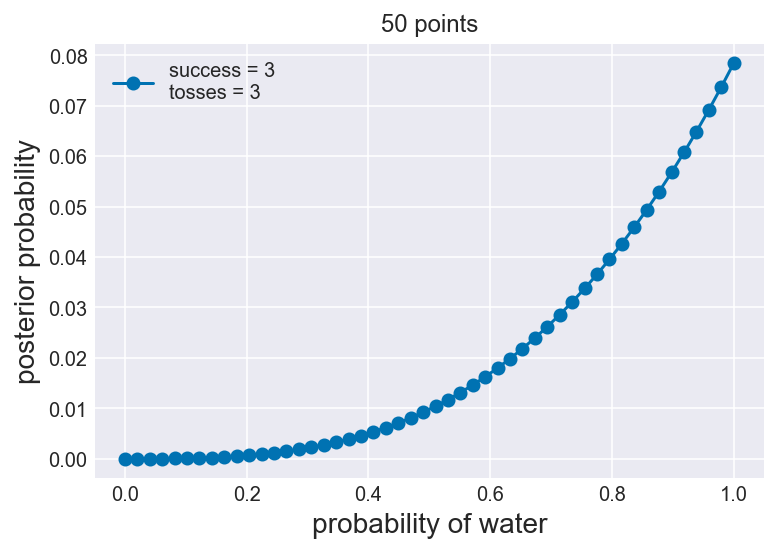

In [18]:
points = 50
w, n = 3, 3
p_grid, posterior = posterior_grid_approx(points, w, n, 'uniform')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

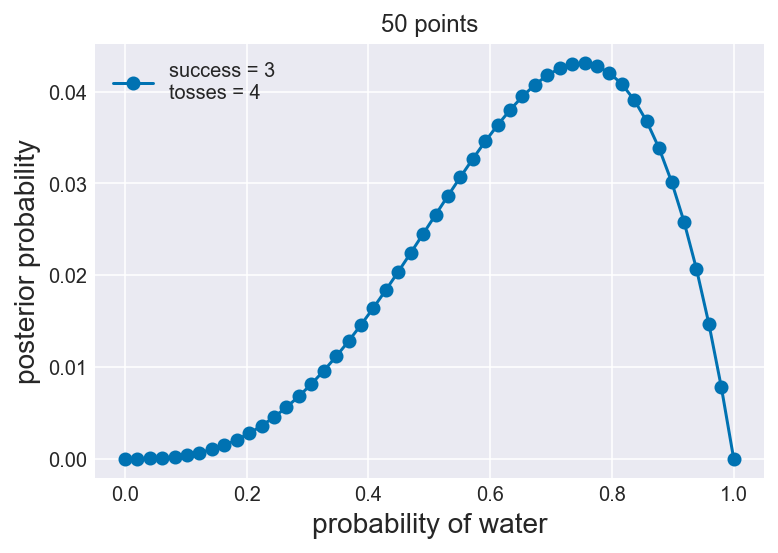

In [19]:
points = 50
w, n = 3, 4
p_grid, posterior = posterior_grid_approx(points, w, n, 'uniform')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


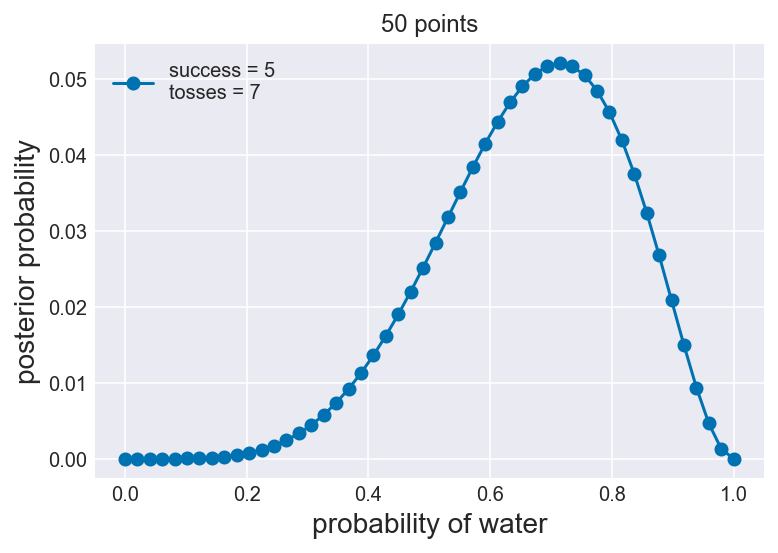

In [21]:
points = 50
w, n = 5, 7
p_grid, posterior = posterior_grid_approx(points, w, n, 'uniform')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


#### 2M2.

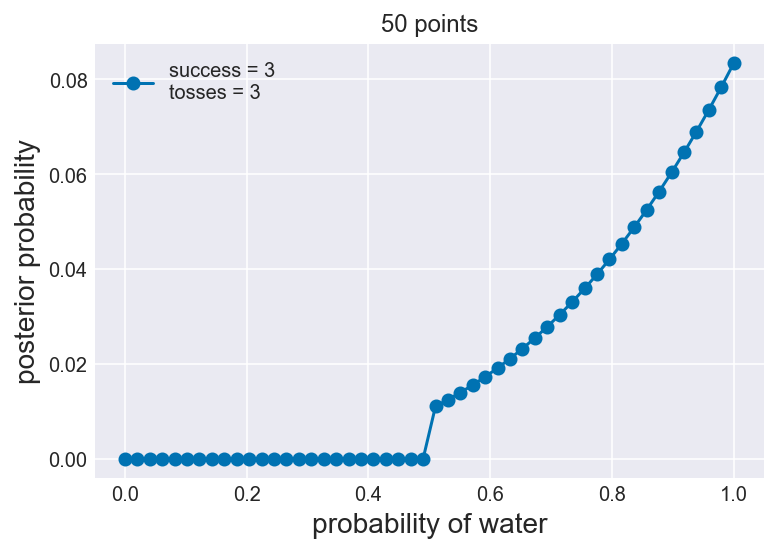

In [22]:
points = 50
w, n = 3, 3
p_grid, posterior = posterior_grid_approx(points, w, n, 'truncated')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


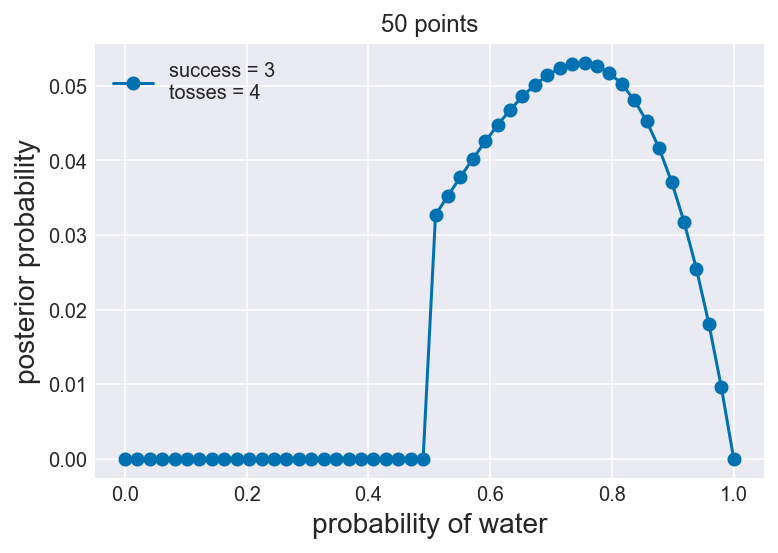

In [23]:
points = 50
w, n = 3, 4
p_grid, posterior = posterior_grid_approx(points, w, n, 'truncated')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


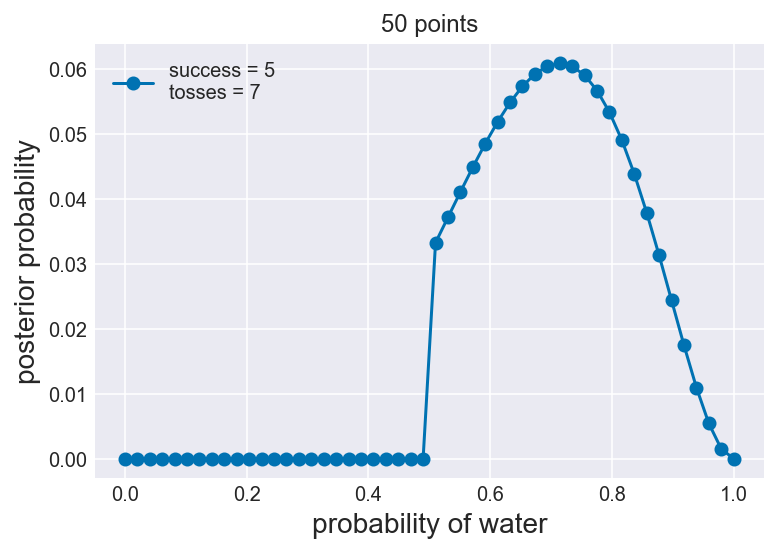

In [24]:
points = 50
w, n = 5, 7
p_grid, posterior = posterior_grid_approx(points, w, n, 'truncated')
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


#### 2M3.

In [25]:
0.5 * 0.3 / (0.5 * 0.3 + 0.5 * 1)

0.23076923076923075

In [29]:
def mcmc(n=100):
    import numpy as np
    from collections import Counter
    
    count = 0
    planets = []
    
    while count < n:
        if np.random.rand() < 0.5:  # earth
            planet = 'earth'
            if np.random.rand() < 0.7:  # water
                toss = 'water'
            else:
                toss = 'land'
        else:
            planet = 'mars'
            toss = 'land'
        if toss == 'land':
            planets.append(planet)
            count += 1
    c = Counter(planets)
    print("mcmc of Pr(earth|land) is:", c['earth'] / sum(c.values()))
    return c

In [30]:
mcmc(10000)

mcmc of Pr(earth|land) is: 0.235


Counter({'mars': 7650, 'earth': 2350})

#### 2M4.

In [43]:
card1 = ['white', 'white']
card2 = ['black', 'white']
card3 = ['black', 'black']


outcomes = []
for card in [card1, card2, card3]:
    for face, face_value in enumerate(card):
        if face == 1:
            bottom = 0
        else:
            bottom = 1
        outcomes.append((face_value, card[bottom]))


total_n_outcomes = len(list(outcome for outcome in outcomes if outcome[0] == 'black'))
blakc_down_n_outcomes = len(list(outcome for outcome in outcomes if outcome == ('black', 'black')))
print(f"Pr(bottom is black|face is black) = {blakc_down_n_outcomes}/{total_n_outcomes}")

Pr(bottom is black|face is black) = 2/3


#### 2M5.

In [44]:
card1 = ['white', 'white']
card2 = ['black', 'white']
card3 = ['black', 'black']
card4 = ['black', 'black']

outcomes = []
for card in [card1, card2, card3, card4]:
    for face, face_value in enumerate(card):
        if face == 1:
            bottom = 0
        else:
            bottom = 1
        outcomes.append((face_value, card[bottom]))


total_n_outcomes = len(list(outcome for outcome in outcomes if outcome[0] == 'black'))
blakc_down_n_outcomes = len(list(outcome for outcome in outcomes if outcome == ('black', 'black')))
print(f"Pr(bottom is black|face is black) = {blakc_down_n_outcomes}/{total_n_outcomes}")

Pr(bottom is black|face is black) = 4/5


#### 2M6.

In [46]:
card1 = ['white', 'white']
card12 = ['white', 'white']
card13 = ['white', 'white']
card2 = ['black', 'white']
card22 = ['black', 'white']
card3 = ['black', 'black']

outcomes = []
for card in [card1, card2, card3, card12, card13, card22]:
    for face, face_value in enumerate(card):
        if face == 1:
            bottom = 0
        else:
            bottom = 1
        outcomes.append((face_value, card[bottom]))


total_n_outcomes = len(list(outcome for outcome in outcomes if outcome[0] == 'black'))
blakc_down_n_outcomes = len(list(outcome for outcome in outcomes if outcome == ('black', 'black')))
print(f"Pr(bottom is black|face is black) = {blakc_down_n_outcomes}/{total_n_outcomes}")

Pr(bottom is black|face is black) = 2/4


#### 2M.7

In [51]:
def random_reorder(arr, p):
    """random reorder elements in list based on p"""
    import random
    assert sum(p) == 1 and len(arr) == len(p)
    if len(arr) == 1:
        return arr[:]
    else:
        cump = [0]
        for pp in p:
            cump.append(cump[-1] + pp)
        r = random.random()
        ans = []
        for i in range(len(p)):
            lower, upper = cump[i], cump[i+1]
            if r >= lower and r < upper:
                ans.append(arr[i])
                break
        newarr = arr[:i] + arr[i+1:]
        newp = p[:i] + p[i+1:]
        sp = sum(newp)
        newp = [p / sp for p in newp]
        return ans + random_reorder(newarr, newp)


In [75]:
import collections

# unittest
c = [random_reorder(['white', 'red', 'black'], [0.2, 0.3, 0.5])[0] for i in range(100000)]
print(collections.Counter(c))

Counter({'black': 49722, 'red': 30176, 'white': 20102})


In [74]:
from itertools import permutations 

card1 = ['white', 'white']
card2 = ['black', 'white']
card3 = ['black', 'black']

perm = permutations([card1, card2, card3]) 

outcomes = []
for p in perm:
    c1, c2 = p[:2]
    for c1 in permutations(c1):
        for c2 in permutations(c2):
            if c1[0] == 'black' and c2[0] == 'white':
                outcomes.append(c1[1])

total_n_outcomes = len(outcomes)
blakc_down_n_outcomes = len(list(outcome for outcome in outcomes if outcome == 'black'))
print(f"Pr(bottom is black|face is black) = {blakc_down_n_outcomes}/{total_n_outcomes}")

Pr(bottom is black|face is black) = 6/8


### Hard

#### 2H1.

In [82]:
# 0.5 means 2 species are equally common in the area

p1 = 0.1 * 0.5 / (0.1 * 0.5 + 0.2 * 0.5) # Prob bear mom belongs to 1
p2 = 0.2 * 0.5 / (0.1 * 0.5 + 0.2 * 0.5) # Prob bear mom belongs to 2
print(p1, p2)

p_birth_twin_next = p1 * 0.1 + p2 * 0.2
print(p_birth_twin_next)

0.3333333333333333 0.6666666666666666
0.16666666666666666


#### 2H2.

In [83]:
# suppose the first birth is single kid

p1 = 0.9 * 0.5 / (0.9 * 0.5 + 0.8 * 0.5) # Prob bear mom belongs to 1
p2 = 0.8 * 0.5 / (0.9 * 0.5 + 0.8 * 0.5) # Prob bear mom belongs to 2
print(p1, p2)

p_birth_twin_next = p1 * 0.1 + p2 * 0.2
print(p_birth_twin_next)

0.5294117647058824 0.47058823529411764
0.14705882352941177


#### 2H3.

In [86]:
p1 = 0.1 * 0.9 / (0.1 * 0.9 + 0.2 * 0.8)
p2 = 0.2 * 0.8 / (0.1 * 0.9 + 0.2 * 0.8)
print(p1)

0.36


#### 2H4.

In [89]:
# if test is A then the true Prob that it is A is
p = 0.8 * 0.5 / (0.8 * 0.5 + (1 - 0.65) * 0.5)
print(p)

0.6956521739130436


In [90]:
# basically, we can take 2H3.'s posterior as 2H4.'s prior
# in this case Prior that prevelance of A is 0.36 and B is 0.64
p = 0.8 * 0.36 / (0.8 * 0.36 + (1 - 0.65) * (1 - 0.36))
print(p)


0.5625
